In [1]:
import pickle
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('.../clean_text.csv')
df

,voted_up,clean_token,clean_str
0,True,"['fall', 'guy', 'chill', 'fun', 'game', 'reall...",fall guy chill fun game really need server imp...
1,True,"['give', 'little', 'hug', 'player', 'stare', '...",give little hug player stare back second jump ...
2,True,"['reccomend', 'much', 'buy']",reccomend much buy
3,True,"['hug', 'people']",hug people
4,True,"['little', 'boy', 'like', 'see', 'wipeout', 't...",little boy like see wipeout tv always dream ta...
...,...,...,...
13201,True,"['well', 'make', 'game', 'get', 'enough', 'man...",well make game get enough many way differentia...
13202,True,"['fun', 'competitive', 'especially', 'friend',...",fun competitive especially friend recommend bu...
13203,True,"['game', 'extremely', 'fun', 'nice', 'break', ...",game extremely fun nice break usual drop loot ...
13204,True,"['fun', 'play', 'keep', 'work', 'game']",fun play keep work game


In [3]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 13206 entries, 0 to 13205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   voted_up     13206 non-null  bool  
 1   clean_token  13206 non-null  object
 2   clean_str    13085 non-null  object
dtypes: bool(1), object(2)
memory usage: 219.4+ KB


In [4]:
df.isnull().sum()

voted_up         0
clean_token      0
clean_str      121
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,voted_up,clean_token,clean_str
233,True,[],NaN
251,True,[],NaN
371,True,[],NaN
465,True,[],NaN
519,False,[],NaN
...,...,...,...
12966,True,[],NaN
13112,True,[],NaN
13143,True,[],NaN
13147,False,[],NaN


In [7]:
df.dropna(inplace= True)

In [8]:
df = df[['voted_up','clean_str']]
df

,voted_up,clean_str
0,True,fall guy chill fun game really need server imp...
1,True,give little hug player stare back second jump ...
2,True,reccomend much buy
3,True,hug people
4,True,little boy like see wipeout tv always dream ta...
...,...,...
13201,True,well make game get enough many way differentia...
13202,True,fun competitive especially friend recommend bu...
13203,True,game extremely fun nice break usual drop loot ...
13204,True,fun play keep work game


In [9]:
df.clean_str=df.clean_str.astype(str)

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
df['scores'] = df['clean_str'].apply(lambda review: sid.polarity_scores(review))

df

,voted_up,clean_str,scores
0,True,fall guy chill fun game really need server imp...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp..."
1,True,give little hug player stare back second jump ...,"{'neg': 0.229, 'neu': 0.634, 'pos': 0.137, 'co..."
2,True,reccomend much buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,True,hug people,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp..."
4,True,little boy like see wipeout tv always dream ta...,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."
...,...,...,...
13201,True,well make game get enough many way differentia...,"{'neg': 0.06, 'neu': 0.492, 'pos': 0.447, 'com..."
13202,True,fun competitive especially friend recommend bu...,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou..."
13203,True,game extremely fun nice break usual drop loot ...,"{'neg': 0.154, 'neu': 0.411, 'pos': 0.434, 'co..."
13204,True,fun play keep work game,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp..."


In [12]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df

,voted_up,clean_str,scores,compound
0,True,fall guy chill fun game really need server imp...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.7430
1,True,give little hug player stare back second jump ...,"{'neg': 0.229, 'neu': 0.634, 'pos': 0.137, 'co...",-0.4391
2,True,reccomend much buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,True,hug people,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767
4,True,little boy like see wipeout tv always dream ta...,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.8257
...,...,...,...,...
13201,True,well make game get enough many way differentia...,"{'neg': 0.06, 'neu': 0.492, 'pos': 0.447, 'com...",0.9460
13202,True,fun competitive especially friend recommend bu...,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou...",0.8826
13203,True,game extremely fun nice break usual drop loot ...,"{'neg': 0.154, 'neu': 0.411, 'pos': 0.434, 'co...",0.8467
13204,True,fun play keep work game,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.6908


Text(0.5, 1.0, &#39;Compound Sentiment Distribution&#39;)

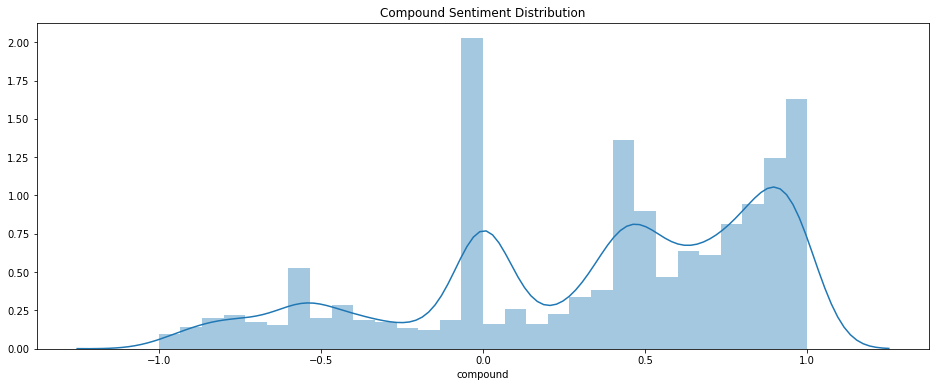

In [13]:
plt.figure(figsize=(16, 6))
sns.distplot(df['compound']).set_title('Compound Sentiment Distribution')

Text(0.5, 1.0, &#39;Sentiment Distribution&#39;)

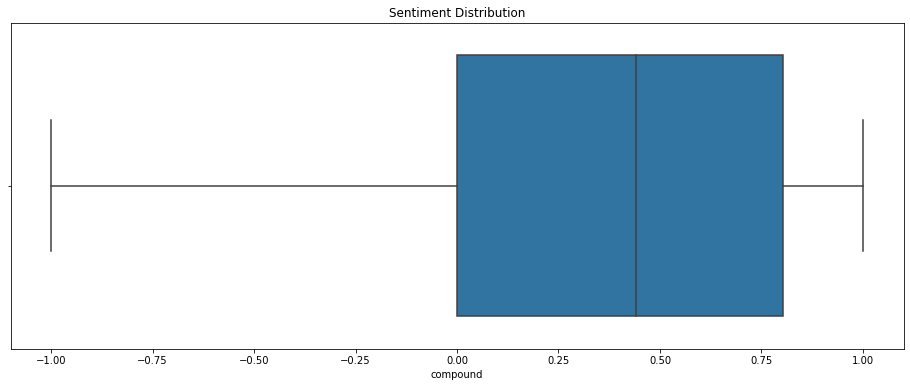

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['compound']).set_title('Sentiment Distribution')

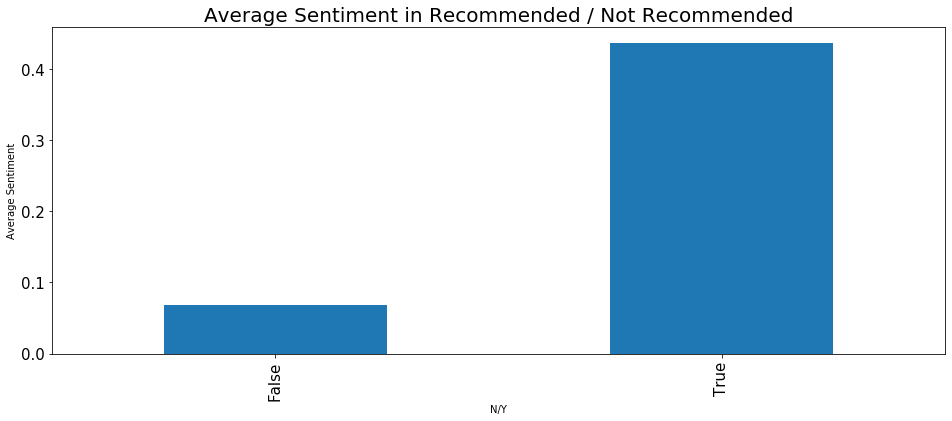

In [15]:
polarity_avg = df.groupby('voted_up')['compound'].mean().plot(kind='bar', figsize=(16,6))
plt.xlabel('N/Y', fontsize=10)
plt.ylabel('Average Sentiment', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Sentiment in Recommended / Not Recommended', fontsize=20)
plt.show()

In [16]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df

,voted_up,clean_str,scores,compound,comp_score
0,True,fall guy chill fun game really need server imp...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.7430,pos
1,True,give little hug player stare back second jump ...,"{'neg': 0.229, 'neu': 0.634, 'pos': 0.137, 'co...",-0.4391,neg
2,True,reccomend much buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,True,hug people,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767,pos
4,True,little boy like see wipeout tv always dream ta...,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.8257,pos
...,...,...,...,...,...
13201,True,well make game get enough many way differentia...,"{'neg': 0.06, 'neu': 0.492, 'pos': 0.447, 'com...",0.9460,pos
13202,True,fun competitive especially friend recommend bu...,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou...",0.8826,pos
13203,True,game extremely fun nice break usual drop loot ...,"{'neg': 0.154, 'neu': 0.411, 'pos': 0.434, 'co...",0.8467,pos
13204,True,fun play keep work game,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.6908,pos


In [17]:
df_false = df.loc[(df['voted_up']==False)]

In [18]:
df_false.comp_score.value_counts()

pos    1987
neg    1421
Name: comp_score, dtype: int64

In [19]:
df_true = df.loc[(df['voted_up']==True)]

In [20]:
df_true.comp_score.value_counts()

pos    8528
neg    1149
Name: comp_score, dtype: int64

In [21]:
df_false

,voted_up,clean_str,scores,compound,comp_score
17,False,hacker destroy game use hack final matchill ch...,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.5423,neg
19,False,hacking ruin game recommend reporting antichea...,"{'neg': 0.284, 'neu': 0.373, 'pos': 0.343, 'co...",-0.0516,neg
20,False,update dev address cheat issue finally add eac...,"{'neg': 0.184, 'neu': 0.682, 'pos': 0.135, 'co...",-0.9896,neg
47,False,game full hacker need report system something,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
48,False,much enjoy game rampant hacker discord remove ...,"{'neg': 0.147, 'neu': 0.669, 'pos': 0.184, 'co...",0.6652,pos
...,...,...,...,...,...
13183,False,really fun first time play get redundant annoy...,"{'neg': 0.091, 'neu': 0.604, 'pos': 0.305, 'co...",0.9708,pos
13189,False,start game,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
13195,False,buy game day release wait release whole hour t...,"{'neg': 0.057, 'neu': 0.569, 'pos': 0.374, 'co...",0.9884,pos
13196,False,really fun start griefer hacker infest game pl...,"{'neg': 0.25, 'neu': 0.568, 'pos': 0.182, 'com...",-0.8371,neg


In [22]:
df_true

,voted_up,clean_str,scores,compound,comp_score
0,True,fall guy chill fun game really need server imp...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.7430,pos
1,True,give little hug player stare back second jump ...,"{'neg': 0.229, 'neu': 0.634, 'pos': 0.137, 'co...",-0.4391,neg
2,True,reccomend much buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,True,hug people,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767,pos
4,True,little boy like see wipeout tv always dream ta...,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.8257,pos
...,...,...,...,...,...
13201,True,well make game get enough many way differentia...,"{'neg': 0.06, 'neu': 0.492, 'pos': 0.447, 'com...",0.9460,pos
13202,True,fun competitive especially friend recommend bu...,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou...",0.8826,pos
13203,True,game extremely fun nice break usual drop loot ...,"{'neg': 0.154, 'neu': 0.411, 'pos': 0.434, 'co...",0.8467,pos
13204,True,fun play keep work game,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.6908,pos


In [23]:
#Accuracy
(8528 + 1421) / (8528 + 1421 + 1149 + 1987)

0.7603362628964463

In [24]:
#False Positive Rate
1421 / (1421 + 1987)

0.4169600938967136

In [24]:
review = 'so many cheaters, fix it'

In [25]:
review1 = "'I like the game, it's fun but the server sucks"

In [26]:
sid.polarity_scores(review)

{&#39;neg&#39;: 0.443, &#39;neu&#39;: 0.557, &#39;pos&#39;: 0.0, &#39;compound&#39;: -0.4902}

In [27]:
sid.polarity_scores(review1)

{&#39;neg&#39;: 0.23, &#39;neu&#39;: 0.495, &#39;pos&#39;: 0.276, &#39;compound&#39;: -0.09}

In [38]:
sentiment = lambda c: 'pos' if c >=0 else 'neg'

In [39]:
output = sid.polarity_scores(review)['compound']

In [40]:
result = sentiment(output)

In [41]:
result

&#39;neg&#39;